## Flight Delay Prediction

# Initial Questions
1. Is it possible to use machine learning to predict flight delay?
2. Is there any correlation between flight informations and the probability of the flight being delayed?

## Dataset

In this project, I used a historical data, which contains information from over 500,000 domestic flights on January 2018 in the United States. The dataset can be retrieved from https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time

## Motivation

When it comes to travelling, people are so excited and get thrilled about what they are going to experience during their journey. Therefore, a lot of travel arrangement has been made such as choosing the best hotel for the best view of the city, opt for the preferred airline and select for the preferred seat in order to get full comfort of travel experience. 

However, things went differently when you reached the airport, you end up being informed that **your aircraft has been delayed**, forcing the airline to deploy another aircraft. This means you lost your preferred seat and part of your planning has been deferred due to the late departure.

#### Imagine that what would it be if all of these things can be predicted and you are being informed for the travel delay when you checked in? 

#### For Passengers:
- Have more time to request for flight delay compensation or renegotiate with the airline and also reschedule their travel arrangement

#### For Airlines:
- Capable of optimizing flight operations and minimize delays for better usability of aircraft and better revenue generation

#### For Airport Operators:
- Have better insight on what aircraft should be prepared and which landing slot available for the delayed aircraft which leads to smooth airport operation

# Data Cleaning

I start the project with importing the necessary libraries  to the environment:
- **Pandas** for data manipulation and processing
- **NumPy** for working with numbers, calculations and arrays
- **Seaborn** and **Matplotlib** for graphical visualisations
- **missingno** for visualizing the missing values
- **sklearn** for machine learning modelling

In [369]:
#Importing relevant libraries
import pandas as pd
import missingno as msno


import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [370]:
# Import January 2018 dataset for training 
df = pd.read_csv("Jan18.csv", low_memory=False)
display(df.head())
len(df) #Check the number of rows

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,...,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM,Unnamed: 108
0,2018,1,14,7,2018-01-14,9E,20363,9E,N279PQ,3468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,1,3,3,2018-01-03,9E,20363,9E,N8928A,3468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,1,6,6,2018-01-06,9E,20363,9E,N8986B,3468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,1,7,7,2018-01-07,9E,20363,9E,N8986B,3468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,1,8,1,2018-01-08,9E,20363,9E,N8918B,3468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


570118

In [371]:
#Check number of columns
df.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM',
       ...
       'DIV4_TAIL_NUM', 'DIV5_AIRPORT', 'DIV5_AIRPORT_ID',
       'DIV5_AIRPORT_SEQ_ID', 'DIV5_WHEELS_ON', 'DIV5_TOTAL_GTIME',
       'DIV5_LONGEST_GTIME', 'DIV5_WHEELS_OFF', 'DIV5_TAIL_NUM',
       'Unnamed: 108'],
      dtype='object', length=109)

In [372]:
#Check for  missing values
df.isnull().sum()

YEAR                       0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
FL_DATE                    0
                       ...  
DIV5_TOTAL_GTIME      570118
DIV5_LONGEST_GTIME    570118
DIV5_WHEELS_OFF       570118
DIV5_TAIL_NUM         570118
Unnamed: 108          570118
Length: 109, dtype: int64

Since some attributes have the numbers of missing values that is equal to the number of rows available, it is make sense to remove all columns that contain with all missing value

In [373]:
df= df.dropna(axis=1, how= "all") # Remove column with all missing values
df.isnull().sum() #Recheck

YEAR                       0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
FL_DATE                    0
                       ...  
DIV2_WHEELS_ON        570089
DIV2_TOTAL_GTIME      570089
DIV2_LONGEST_GTIME    570089
DIV2_WHEELS_OFF       570109
DIV2_TAIL_NUM         570109
Length: 84, dtype: int64

### Selecting Relevant Column

Now, I have 84 columns out of 109, therefore I need to identify which attributes are relevant in predicting flight delay based on the research question.  

In [374]:
#Selecting relevant columns for our project to 32 columns
df = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,19,20,22,29,32,34,35,38,40,43,46,48,51,53,55,56,57,58,59]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570118 entries, 0 to 570117
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   570118 non-null  int64  
 1   MONTH                  570118 non-null  int64  
 2   DAY_OF_MONTH           570118 non-null  int64  
 3   DAY_OF_WEEK            570118 non-null  int64  
 4   FL_DATE                570118 non-null  object 
 5   OP_UNIQUE_CARRIER      570118 non-null  object 
 6   OP_CARRIER_AIRLINE_ID  570118 non-null  int64  
 7   OP_CARRIER             570118 non-null  object 
 8   TAIL_NUM               568149 non-null  object 
 9   OP_CARRIER_FL_NUM      570118 non-null  int64  
 10  ORIGIN_AIRPORT_ID      570118 non-null  int64  
 11  ORIGIN_AIRPORT_SEQ_ID  570118 non-null  int64  
 12  ORIGIN                 570118 non-null  object 
 13  DEST_AIRPORT_ID        570118 non-null  int64  
 14  DEST_AIRPORT_SEQ_ID    570118 non-nu

### Filtering Relevant Columns and Removing All Redundant Features

First, I check whether **FL_DATE** is equal to **DAY_OF MONTH, MONTH and YEAR** by introducing new column named **DATE** combining DAY_OF MONTH, MONTH and YEAR and change to datetime format.

Then, I change FL_DATE to datetime format and compare it with DATE. The same procedures are adapted to OP_UNIQUE_CARRIER and OP_CARRIER. 

In [375]:
#Check whether FL_DATE is equal to DAY_OF MONTH, MONTH and YEAR.
df =df.rename(columns={'DAY_OF_MONTH': 'DAY'})
df["DATE"]=pd.to_datetime(df[['YEAR','MONTH', 'DAY']])
#Change FL_DATE to datetime format and compare it with DATE
df["FL_DATE"] =  pd.to_datetime(df["FL_DATE"])
s = df["FL_DATE"]== df["DATE"]
print("FL_DATE == DATE: ", s.unique())

#Check whether OP_UNIQUE_CARRIER is equal to OP_CARRIER
t = df["OP_UNIQUE_CARRIER"]== df["OP_CARRIER"]
print("OP_UNIQUE_CARRIER == OP_CARRIER: ", t.unique())

FL_DATE == DATE:  [ True]
OP_UNIQUE_CARRIER == OP_CARRIER:  [ True]


Since they are redundant atrributes, now I can drop **FL_DATE, DATE** and **OP_CARRIER**, leaving only **DAY_OF MONTH, MONTH and YEAR**.

In [376]:
df=df.drop(["YEAR", "FL_DATE", "DATE", "OP_CARRIER"], axis=1)
df.head(2)

,MONTH,DAY,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,ARR_DEL15,CANCELLED,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,14,7,9E,20363,N279PQ,3468,15096,1509602,SYR,...,NaN,1.0,0.0,NaN,374.0,NaN,NaN,NaN,NaN,NaN
1,1,3,3,9E,20363,N8928A,3468,15096,1509602,SYR,...,0.0,0.0,0.0,42.0,198.0,NaN,NaN,NaN,NaN,NaN


Now, I explore other redundant features:

1. **ORIGIN_AIRPORT_ID** and **ORIGIN_AIRPORT_SEQ_ID**. 
2. **DEST_AIRPORT_ID** and **DEST_AIRPORT_SEQ_ID**. 
3. **CANCELLED** and **DIVERTED** can be dropped since it is not a part of delayed in our case.
4. **TAXI IN** and **TAXI OUT** also can be dropped.
5. **ARR_DEL15** and **ARR_TIME** can be dropped since I only concerns with **DEP_DEL15** (Departure Delay).
6. **WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY, CARRIER_DELAY** and **AIR_TIME** - Since I'm focusing on the flight delay data, and not the causation of flight delay,all information regarding the causation of flight delays will be dropped.
    
    

In [377]:
df= df.drop(["ORIGIN_AIRPORT_SEQ_ID", "DEST_AIRPORT_SEQ_ID", "CANCELLED", "DIVERTED", 
             "TAXI_IN", "TAXI_OUT", "ARR_TIME", "ARR_DEL15", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", 
             "LATE_AIRCRAFT_DELAY", "CARRIER_DELAY", "AIR_TIME"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570118 entries, 0 to 570117
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   MONTH                  570118 non-null  int64  
 1   DAY                    570118 non-null  int64  
 2   DAY_OF_WEEK            570118 non-null  int64  
 3   OP_UNIQUE_CARRIER      570118 non-null  object 
 4   OP_CARRIER_AIRLINE_ID  570118 non-null  int64  
 5   TAIL_NUM               568149 non-null  object 
 6   OP_CARRIER_FL_NUM      570118 non-null  int64  
 7   ORIGIN_AIRPORT_ID      570118 non-null  int64  
 8   ORIGIN                 570118 non-null  object 
 9   DEST_AIRPORT_ID        570118 non-null  int64  
 10  DEST                   570118 non-null  object 
 11  DEP_TIME               553295 non-null  float64
 12  DEP_DEL15              552795 non-null  float64
 13  DEP_TIME_BLK           570118 non-null  object 
 14  DISTANCE               570118 non-nu

### Visualising the missing values
In this part, I first visualise the missing values for all our selected attributes. Then, I sum the number of mising values and calculate the percentage of missing values.

MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
OP_CARRIER_AIRLINE_ID        0
TAIL_NUM                  1969
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
ORIGIN                       0
DEST_AIRPORT_ID              0
DEST                         0
DEP_TIME                 16823
DEP_DEL15                17323
DEP_TIME_BLK                 0
DISTANCE                     0
dtype: int64


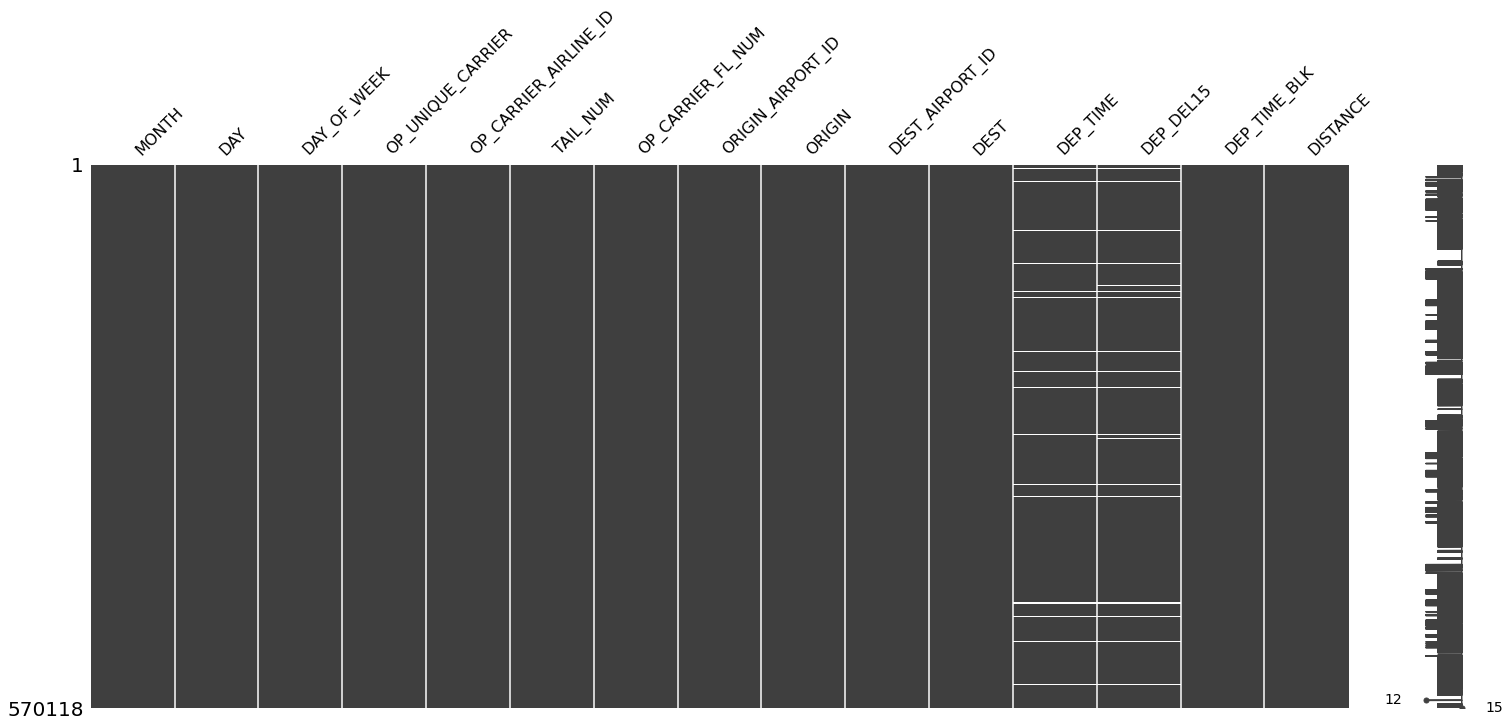

In [378]:
#To visualise missing data
print(df.isnull().sum())
msno.matrix(df)

### Dealing with missing values

As you can see, I have 3 attributes with missing values. In my opinion, for attributes such as tail number, the missing values are impossible to be imputed. 

To deal with it, I try to check whether the missing values are coming from the same rows or not.




In [379]:
#Check whether missing values come from the same rows
check=df.loc[df["DEP_DEL15"].isnull(), ["DEP_DEL15","DEP_TIME", "TAIL_NUM"]]
display(check)
print(check.isnull().sum())

,DEP_DEL15,DEP_TIME,TAIL_NUM
0,NaN,NaN,N279PQ
20,NaN,1358.0,N836AY
21,NaN,1358.0,N820AY
29,NaN,NaN,N8837B
30,NaN,NaN,N8683B
...,...,...,...
569792,NaN,NaN,N280AK
569800,NaN,NaN,N569AS
569810,NaN,NaN,N569AS
569826,NaN,NaN,N524AS


DEP_DEL15    17323
DEP_TIME     16823
TAIL_NUM      1969
dtype: int64


It is now confirmed that the rows with missing value of **DEP_DEL15**, have the missing values also for the **DEP_TIME** and also **TAIL_NUM**. 

Since the missing values are less than 5%, I decided to omit all the rows with missing values and check for the percentage of available data after removing it. Then, visualize with msno to check whether all rows are now cleaned or not. 

MONTH                    0
DAY                      0
DAY_OF_WEEK              0
OP_UNIQUE_CARRIER        0
OP_CARRIER_AIRLINE_ID    0
TAIL_NUM                 0
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
DEP_TIME                 0
DEP_DEL15                0
DEP_TIME_BLK             0
DISTANCE                 0
dtype: int64


96.96150621450296

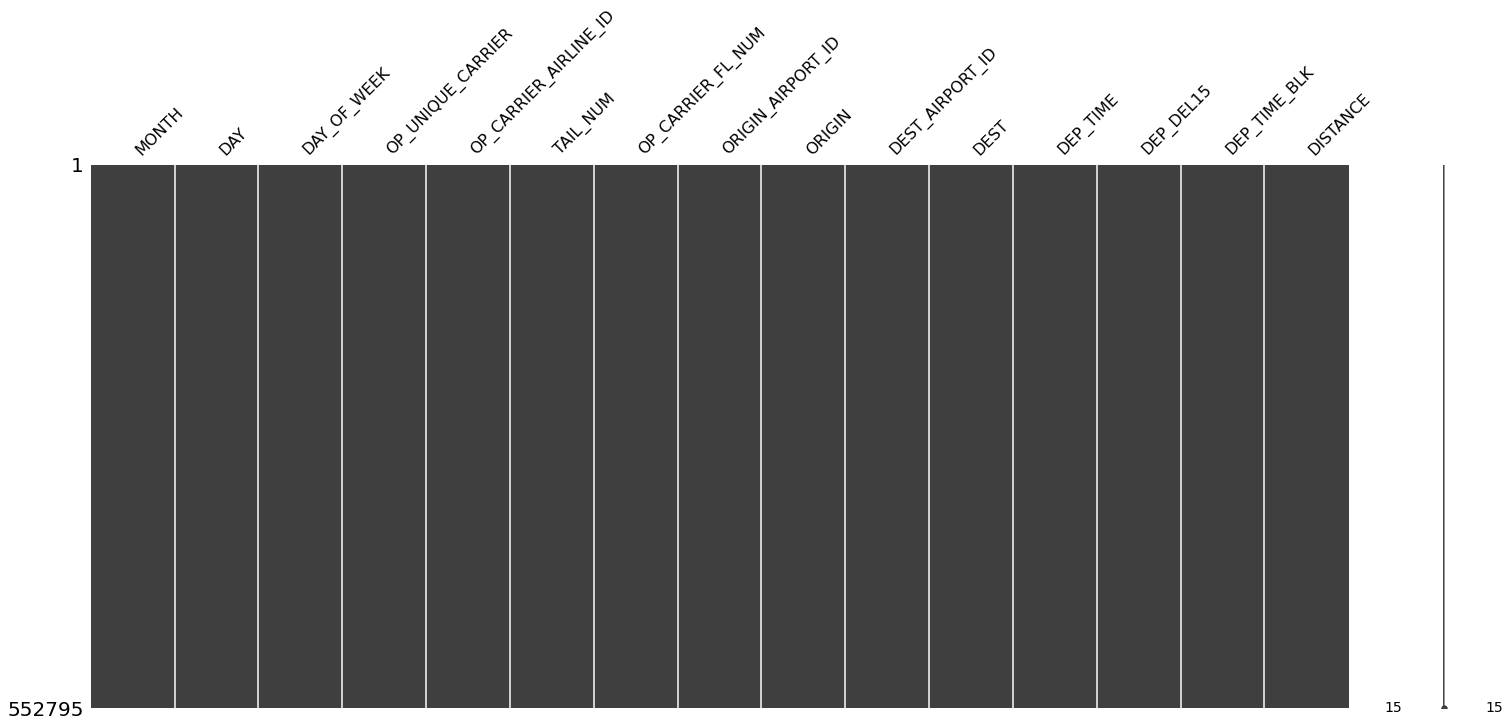

In [380]:
df= df.dropna(axis=0,subset=["TAIL_NUM", "DEP_TIME", "DEP_DEL15"]) 
print(df.isnull().sum())
msno.matrix(df)
# Percentage of available rows after dropping rows with missing values
(len(df)/570118)*100

### Saving the cleaned dataset

In [381]:
#Save the cleaned dataset
#df.to_csv("cleaned_data_jan2018.csv", index = False)

# Exploratory Data Analysis (EDA)

EDA starts with importing the cleaned January 2018 dataset. First, I explore the datatype and recheck the cleaned data.

In [382]:
jan18 = pd.read_csv(("cleaned_data_jan2018.csv"), low_memory=False)
jan18.dtypes     #Check data type

MONTH                      int64
DAY                        int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
TAIL_NUM                  object
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN                    object
DEST_AIRPORT_ID            int64
DEST                      object
DEP_TIME                 float64
DEP_DEL15                float64
DEP_TIME_BLK              object
DISTANCE                 float64
dtype: object

In [383]:
#Checking any null value
jan18.isnull().values.any()

False

Then, I build a correlation matrix to see the underlying factors between one attribute to another that contribute to flight delay.

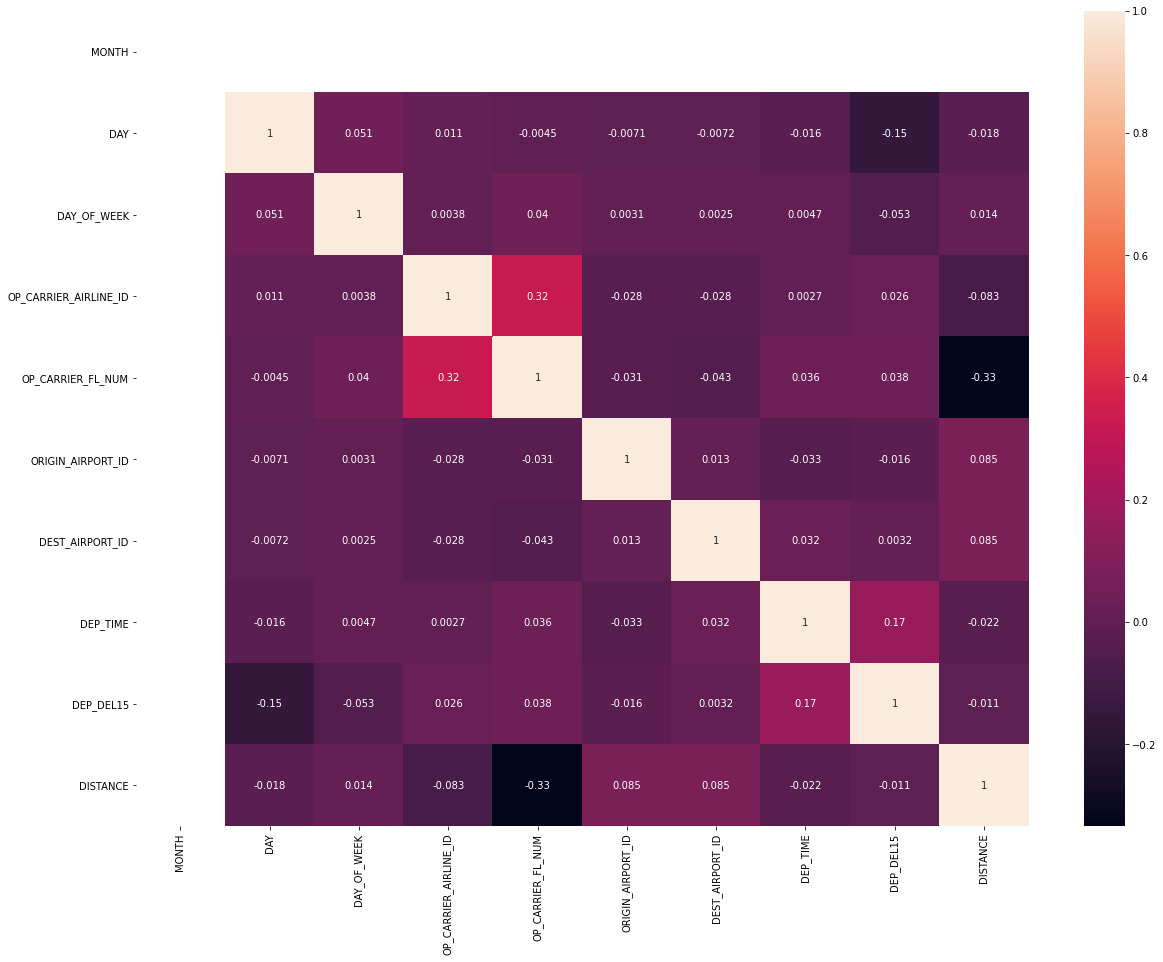

In [384]:
#Correlation matrix
df18 = jan18
corrMatrix = df18.corr()
plt.figure(figsize=(20,15))
ax=plt.subplot(111)
sns.heatmap(corrMatrix,ax=ax, annot=True)
plt.show()

As **DEP_DEL15** is a targetted variable, I want to see the unique values it can return:


In [385]:
df18['DEP_DEL15'].value_counts()

0.0    453644
1.0     99151
Name: DEP_DEL15, dtype: int64

In [386]:
#Obtaining the statistical summary
df18.describe()

,MONTH,DAY,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DEL15,DISTANCE
count,552795.0,552795.000000,552795.000000,552795.000000,552795.000000,552795.000000,552795.000000,552795.000000,552795.000000,552795.000000
mean,1.0,16.087414,3.740622,19992.150940,2557.342572,12660.970989,12661.375436,1333.554368,0.179363,797.461337
std,0.0,8.995561,1.995600,396.822513,1882.338538,1517.905842,1518.067833,495.314692,0.383656,593.569162
min,1.0,1.000000,1.000000,19393.000000,1.000000,10135.000000,10135.000000,1.000000,0.000000,31.000000
25%,1.0,8.000000,2.000000,19790.000000,912.000000,11292.000000,11292.000000,922.000000,0.000000,361.000000
50%,1.0,16.000000,4.000000,19977.000000,2011.000000,12889.000000,12889.000000,1329.000000,0.000000,634.000000
75%,1.0,24.000000,5.000000,20368.000000,4018.000000,13931.000000,13931.000000,1738.000000,0.000000,1034.000000
max,1.0,31.000000,7.000000,21171.000000,7439.000000,16218.000000,16218.000000,2400.000000,1.000000,4983.000000


Here are the airlines details:

|  Airlines Code   | Airline Name | 
| --- | --- |
| WN | Southwest Airlines |
| OO | Skywest Airlines |
| DL | Delta Airlines |
| AA | American Airlines |
| B6 | JetBlue Airways |
| UA | United Airways |
| OH | PSA Airlines |
| MQ | Envoy - American Eagles|
| YX | Republic Airways |
| EV | ExpressJet |
| 9E | Endeavor Air |
| YV | Mesa Airlines |
| F9 | Frontier Airlines |
| NK | Spirit Airlines |
| G4 | Allegiant Air |
| AS | Alaska Airlines |
| VX | Virgin America |
| HA | Hawaiaan Airlines |






Next, I want to visualize the on time performance vs departure delay by airlines. I also interested in knowing which Airlines recorded the highest departure delay throughout January 2018:

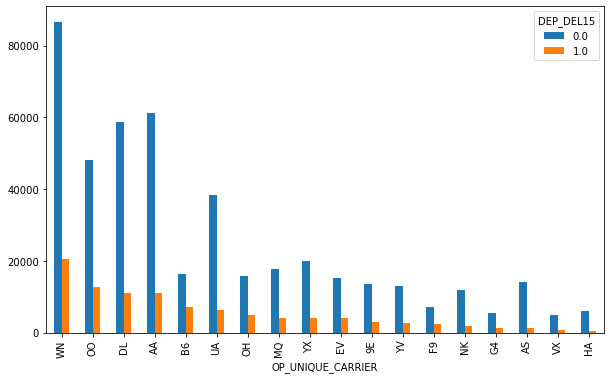

In [387]:
df18_carr = df18.groupby(['OP_UNIQUE_CARRIER']).DEP_DEL15.value_counts().unstack()
df18_carr.sort_values(1, ascending=False).plot(kind='bar', figsize=(10,6))

**Conclusion**:The Carrier Airline is ranked based on **DEP_DELAY**. B6 (JetBlue Airways) relatively shows a high delay ratio. Otherwise, the more the flights, the more the delay.

WN (Southwest Airlines) recorded the highest departure delay in January 2018.

Now, I want to see which **DAY_OF_WEEK** and which **DEP_TIME_BLK** has the highest flight departure delay:

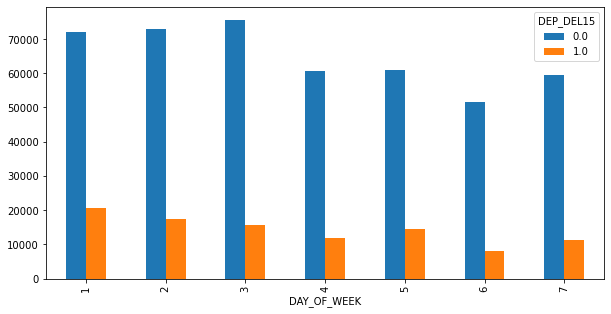

In [388]:
df18_Day = df18.groupby(['DAY_OF_WEEK']).DEP_DEL15.value_counts().unstack()
df18_Day.plot(kind='bar', figsize=(10,5))

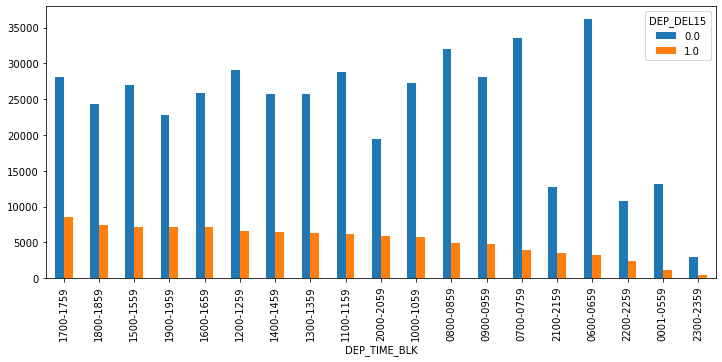

In [389]:
df18_TimeBlk = df18.groupby(['DEP_TIME_BLK']).DEP_DEL15.value_counts().unstack()
df18_TimeBlk = df18_TimeBlk.sort_values(1, ascending=False) #Sort descending by DEP_DEL15
df18_TimeBlk.plot(kind='bar', figsize=(12,5))

In [390]:
df_tb = df18.groupby(['DEP_TIME_BLK']).DEP_DEL15.value_counts().unstack()
df_tb['ratio'] = (df_tb[1]/df_tb[0])
df_tb.sort_values('ratio', ascending=False)

DEP_DEL15,0.0,1.0,ratio
DEP_TIME_BLK,,,
1900-1959,22785,7110,0.312047
1800-1859,24364,7490,0.307421
1700-1759,28147,8577,0.304722
2000-2059,19502,5849,0.299918
2100-2159,12688,3516,0.277112
1600-1659,25857,7103,0.274703
1500-1559,27028,7153,0.264651
1400-1459,25699,6510,0.253317
1300-1359,25697,6365,0.247694


**Conclusion**: I can conclude that Day 3(Wednesday) of week have relatively low ratio of delay, whereas Day 1(Monday) shows the highest departure delay. Most delays occur in 1700-1759 Blk. 1900-1959 has the greatest ratio of delay.

Possibility for departure delay is high during 6pm - 10pm

## Modeling

Creating Test and Train datasets:

In [428]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

Before starting the modeling, I checked first the targeted variable to see if the data are biased or not

In [392]:
jan18["DEP_DEL15"].value_counts()

0.0    453644
1.0     99151
Name: DEP_DEL15, dtype: int64

As you can see above, the data are quite biased because not delayed flight data are far more than the delayed flight data. This will cause problems during training the data. So, I balanced the data.  

In [393]:
df18_Jan_0 = jan18[jan18.DEP_DEL15==0].sample(n=99000) # Extract 8000 rows with no delay randomly
df18_Jan_1 = jan18[jan18.DEP_DEL15==1].sample(n=99000) # Extract 8000 rows with delay randomly
df18_Jan_Balanced = df18_Jan_0.append(df18_Jan_1) # Combine the df, with delay and without delay
df18_Jan_Balanced = df18_Jan_Balanced.sample(frac = 1) # Shuffle the rows of the combined df

In [394]:
#Save the cleaned dataset
#df18_Jan_Balanced.to_csv("df18_Jan_Balanced.csv", index = False)

In [395]:
jan18=pd.read_csv("df18_Jan_Balanced.csv")
jan18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198000 entries, 0 to 197999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   MONTH                  198000 non-null  int64  
 1   DAY                    198000 non-null  int64  
 2   DAY_OF_WEEK            198000 non-null  int64  
 3   OP_UNIQUE_CARRIER      198000 non-null  object 
 4   OP_CARRIER_AIRLINE_ID  198000 non-null  int64  
 5   TAIL_NUM               198000 non-null  object 
 6   OP_CARRIER_FL_NUM      198000 non-null  int64  
 7   ORIGIN_AIRPORT_ID      198000 non-null  int64  
 8   ORIGIN                 198000 non-null  object 
 9   DEST_AIRPORT_ID        198000 non-null  int64  
 10  DEST                   198000 non-null  object 
 11  DEP_TIME               198000 non-null  float64
 12  DEP_DEL15              198000 non-null  float64
 13  DEP_TIME_BLK           198000 non-null  object 
 14  DISTANCE               198000 non-nu

Some of the data types are in object forms. To handle that, I encoded all categories feature:

In [396]:
def encode_categories(features):
    lb_make = LabelEncoder()
    for i in range(len(features)):
        jan18[features[i]] = lb_make.fit_transform(jan18[features[i]])

In [397]:
encode_categories(['OP_UNIQUE_CARRIER','TAIL_NUM','ORIGIN','DEST','DEP_TIME_BLK',])
jan18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198000 entries, 0 to 197999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   MONTH                  198000 non-null  int64  
 1   DAY                    198000 non-null  int64  
 2   DAY_OF_WEEK            198000 non-null  int64  
 3   OP_UNIQUE_CARRIER      198000 non-null  int64  
 4   OP_CARRIER_AIRLINE_ID  198000 non-null  int64  
 5   TAIL_NUM               198000 non-null  int64  
 6   OP_CARRIER_FL_NUM      198000 non-null  int64  
 7   ORIGIN_AIRPORT_ID      198000 non-null  int64  
 8   ORIGIN                 198000 non-null  int64  
 9   DEST_AIRPORT_ID        198000 non-null  int64  
 10  DEST                   198000 non-null  int64  
 11  DEP_TIME               198000 non-null  float64
 12  DEP_DEL15              198000 non-null  float64
 13  DEP_TIME_BLK           198000 non-null  int64  
 14  DISTANCE               198000 non-nu

Now, splitting the data into train and test

In [398]:
feature_names = ['MONTH','DAY','DAY_OF_WEEK','OP_UNIQUE_CARRIER','OP_CARRIER_AIRLINE_ID','TAIL_NUM','OP_CARRIER_FL_NUM','ORIGIN_AIRPORT_ID','ORIGIN','DEST_AIRPORT_ID','DEST','DEP_TIME_BLK', 'DISTANCE']
X =  jan18[feature_names].values
y =  jan18['DEP_DEL15'].values

In [399]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Now, I am ready to build the model. In this case, I chose Decision Tree, Gradient Boosting and Random Forest for modeling the datasets. 

### Model 1: Decision Tree

Build Model

In [400]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

Check model accuracy 

In [401]:
#Train Accuracy
overfit_check = dt.predict(X_train)
Train = accuracy_score(y_train, overfit_check)

#Test Accuracy
y_model = dt.predict(X_test)
Test = accuracy_score(y_test, y_model)

#Print Results:
print("Decision Tree")
print("Training Accuracy: ", Train)
print("Testing Accuracy: ", Test)

Decision Tree
Training Accuracy:  0.6213573232323232
Testing Accuracy:  0.6231818181818182


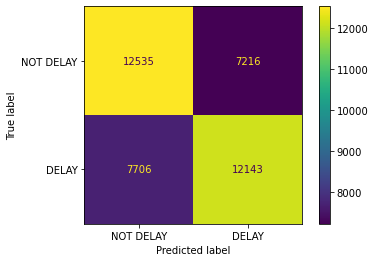

In [402]:
from sklearn.metrics import plot_confusion_matrix
categories_name=["NOT DELAY", "DELAY"]
plot_confusion_matrix(dt, X_test, y_test,
                                     display_labels=categories_name)

Precision and Recall:

In [403]:
precision = precision_score(y_test, y_model, average='binary')
recall = recall_score(y_test, y_model, average='binary')
print('Avg Precision:', precision)
print('Avg Recall:', recall)

Avg Precision: 0.6272534738364585
Avg Recall: 0.6117688548541488


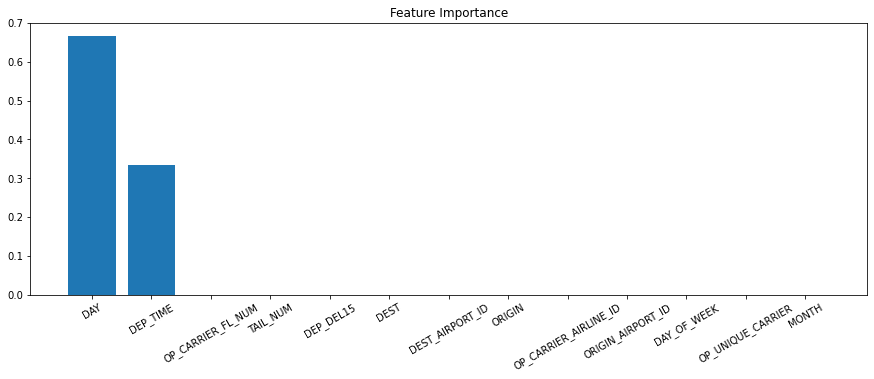

In [418]:
importances = dt.feature_importances_


plt.figure(figsize=(15,5))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=30, fontsize = 10)
plt.title("Feature Importance")
plt.show()

### Model 2: Gradient Boosting

In [405]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

Check model accuracy

In [406]:
#Train Accuracy
overfit_check = gb.predict(X_train)
Train = accuracy_score(y_train, overfit_check)

#Test Accuracy
y_model = gb.predict(X_test)
Test = accuracy_score(y_test, y_model)

#Print Results:
print("Gradient Boosting")
print("Training Accuracy: ", Train)
print("Testing Accuracy: ", Test)

Gradient Boosting
Training Accuracy:  0.6519255050505051
Testing Accuracy:  0.6530050505050505


Confusion Matrix

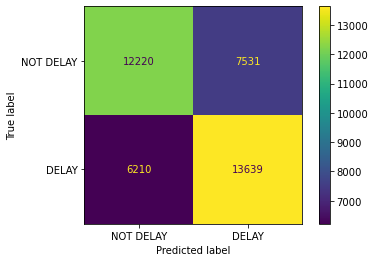

In [407]:
from sklearn.metrics import plot_confusion_matrix
categories_name=["NOT DELAY", "DELAY"]
plot_confusion_matrix(gb, X_test, y_test,
                                     display_labels=categories_name)

Precision and Recall:

In [408]:
precision = precision_score(y_test, y_model, average='binary')
recall = recall_score(y_test, y_model, average='binary')
print('Avg Precision:', precision)
print('Avg Recall:', recall)

Avg Precision: 0.6442607463391592
Avg Recall: 0.6871378910776361


Feature Importance

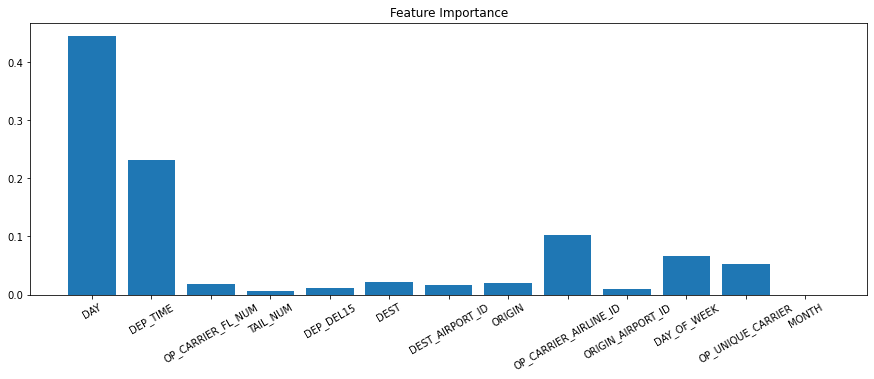

In [417]:
importances = gb.feature_importances_


plt.figure(figsize=(15,5))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=30, fontsize = 10)
plt.title("Feature Importance")
plt.show()

### Model 3: Random Forest

In [424]:
rf = RandomForestClassifier(n_estimators = 350,max_depth=26,min_samples_leaf=15,min_samples_split=2, n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=26, min_samples_leaf=15, n_estimators=350,
                       n_jobs=-1)

In [425]:
#Train Accuracy
overfit_check = rf.predict(X_train)
Train = accuracy_score(y_train, overfit_check)

#Test Accuracy
y_model = rf.predict(X_test)
Test = accuracy_score(y_test, y_model)

#Print Results:
print("Random Forest")
print("Training Accuracy: ", Train)
print("Testing Accuracy: ", Test)

Random Forest
Training Accuracy:  0.7739583333333333
Testing Accuracy:  0.6876262626262626


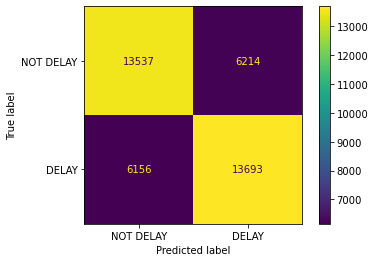

In [426]:
from sklearn.metrics import plot_confusion_matrix
categories_name=["NOT DELAY", "DELAY"]
plot_confusion_matrix(rf, X_test, y_test,
                                     display_labels=categories_name)

Precision and Recall:

In [427]:
precision = precision_score(y_test, y_model, average='binary')
recall = recall_score(y_test, y_model, average='binary')
print('Avg Precision:', precision)
print('Avg Recall:', recall)

Avg Precision: 0.687848495504094
Avg Recall: 0.6898584311552219


Feature importance

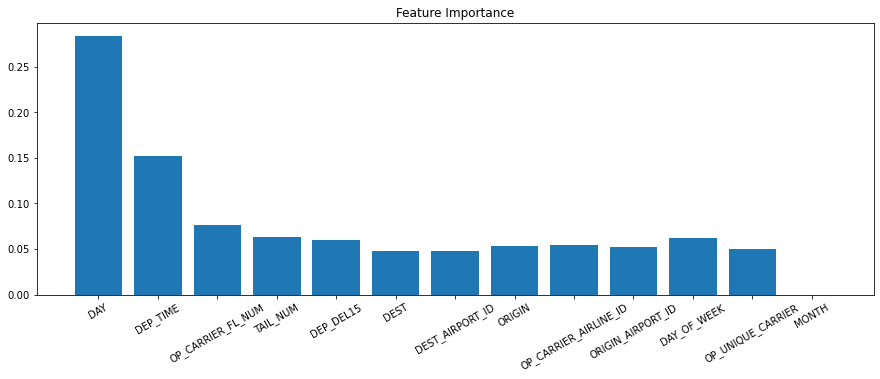

In [416]:
importances = rf.feature_importances_


plt.figure(figsize=(15,5))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=30, fontsize = 10)
plt.title("Feature Importance")
plt.show()

## Model Evaluation

Looking at the accuracy and confusion matrix, we can immediately notice that **Random Forest model** is quite good in predicting non-delayed and delayed flights. For the non-delayed flight, 13537 are correctly predicted  and only 6214 falsely predicted observations. As for delayed flights, the model predicted  13693 delayed flights correctly with 6156 wrongly predicted observations. The prediction for both delayed and non-delayed flights are quite balanced where it recorded about leass than 50% of false prediction. 

To conclude the evaluation, the **Random Forest model** is chosen as the final best model. This is because:
- The model has reasonably high average accuracy of 0.6876 compared to the other two models.
- The average precision and recall for this model are 0.6878 and 0.6899 respectively which are acceptable.
- The model has a **lower rate of False Negatives** compared to the other 2 models, which means this model **performs best at predicting delayed flights as delayed** . As shown in the confusion matrix, the model correctly predicts 13693 delayed flights as delayed and only 6156 delayed flights are wrongly predicted as not delayed.
- In the flight delay problem, we want the False Negative rate of our final model to be as low as possible because in real life situation, falsely informing customers that a delayed flight is not delayed is much worse than predicting that a non-delayed flight is delayed.

- To answer the earlier questions, the prediction of flight delay can be evaluated through various machine learning models in which all of the show accuracy of more than 60%. 
- It was found that there is a correlation between flight informations and the probability of the flight being delayed. Based on the feature importance analysis on each of the tested machine learning algorithm, it is apparent that the DAY (day of flight departure) and DEP_TIME  demostrated as the top 2 variables with highest correlation on the probability of flight delay.